### Credit Scoring Model Using Machine Learning

In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer,KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import cross_val_score


# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz 
from sklearn.model_selection import GridSearchCV

C:\Users\USER\AppData\Local\Temp\ipykernel_1296\2554302289.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Understanding

In [2]:
# loading our dataframes 
test = pd.read_csv("test.csv")
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [3]:
# loading our dataframes 
train = pd.read_csv("train.csv")
train.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_1296\3476682533.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
## merging our datasets 

df = train

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
# checking  the columns 
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
# checking the info on our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Data Preprocessing 

In [8]:
### checking for percentage of missing values 
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
# check for duplicates 
df.duplicated().sum()

0

In [10]:
## dropping unnecessary columns 
df.drop(["ID","Name","SSN"],axis=1,inplace=True)

In [11]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

In [13]:
## correcting typecasting errors ,   
columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
            'Changed_Credit_Limit','Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']


# converting from  object to numeric 
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       95061 non-null   float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             93020 non-null   float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               95215 non-null   float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    90254 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

In [14]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [15]:
df['Age'].value_counts()

Age
38.0      2833
28.0      2829
31.0      2806
26.0      2792
32.0      2749
          ... 
5741.0       1
7178.0       1
5621.0       1
1908.0       1
1342.0       1
Name: count, Length: 1661, dtype: int64

In [16]:
df.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [17]:
df["Age"].value_counts()

Age
38.0      2833
28.0      2829
31.0      2806
26.0      2792
32.0      2749
          ... 
5741.0       1
7178.0       1
5621.0       1
1908.0       1
1342.0       1
Name: count, Length: 1661, dtype: int64

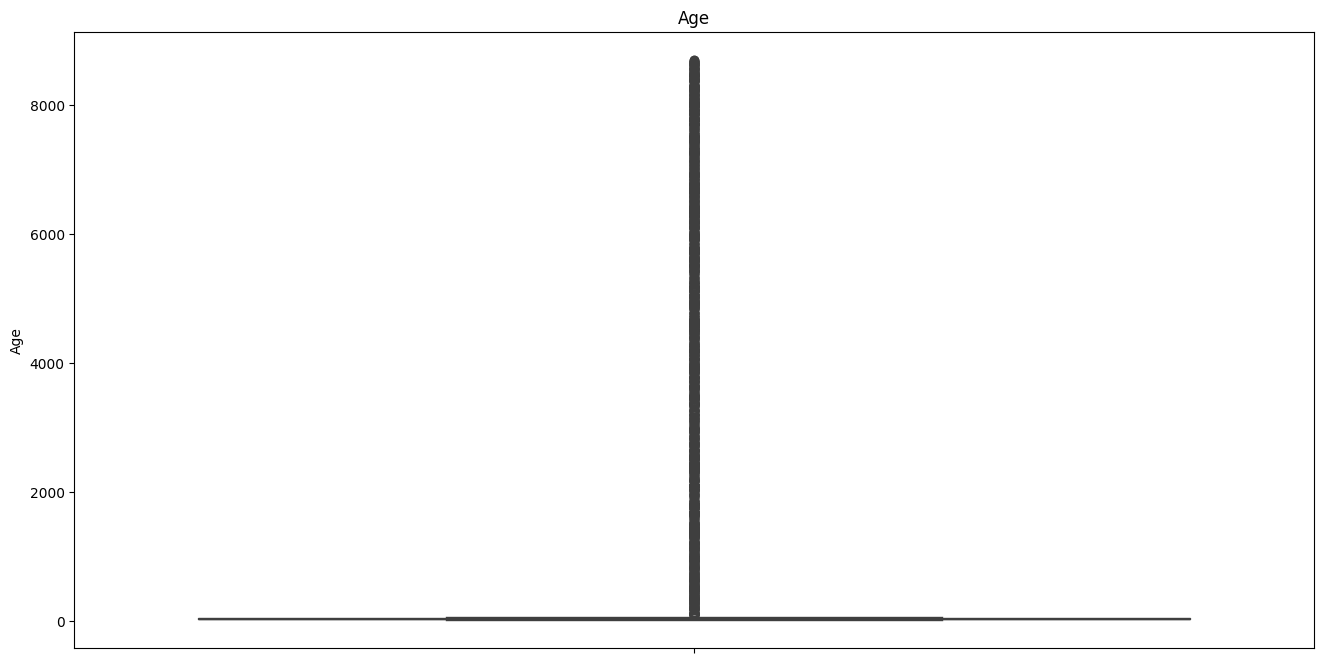

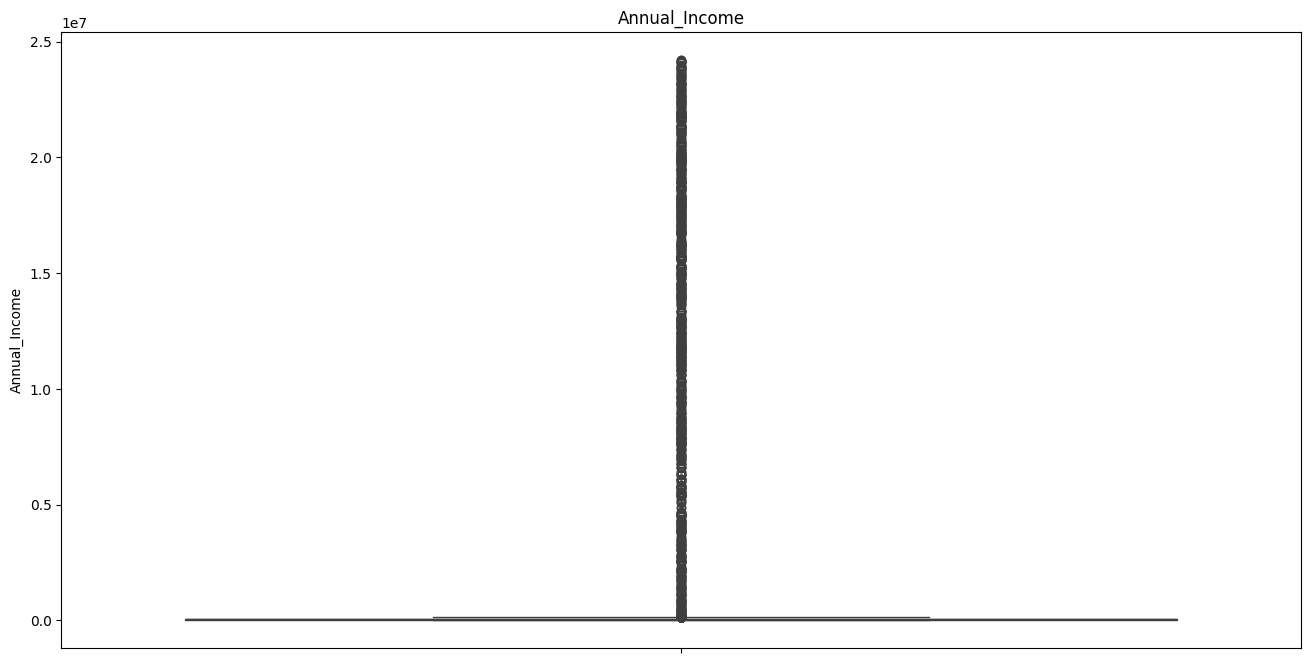

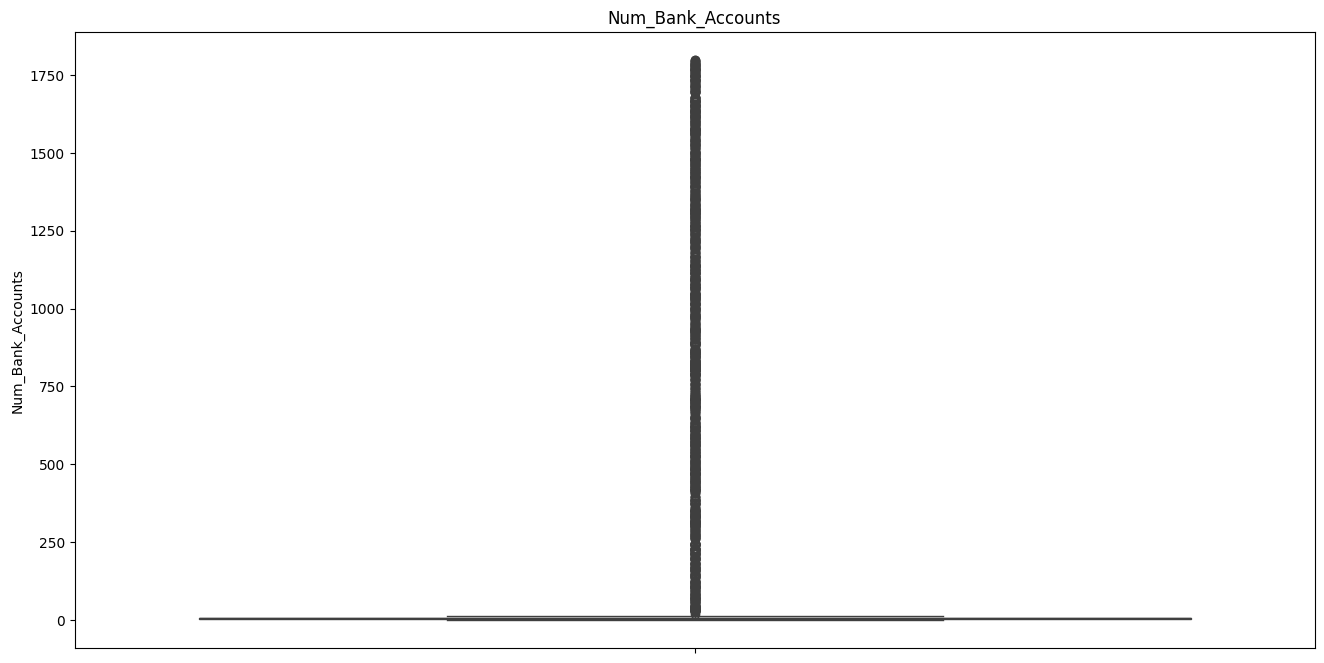

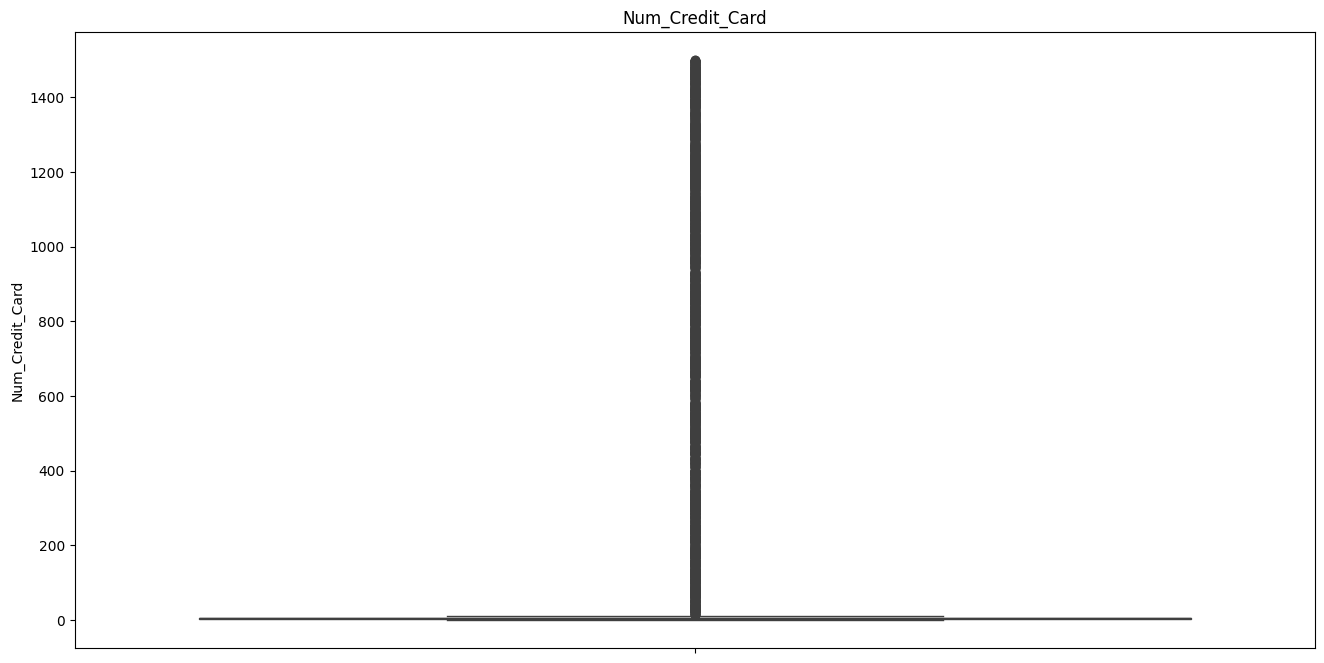

In [18]:
# checking for outliers 
for col in ['Age', 'Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card']:
    plt.figure(figsize= (16,8))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()


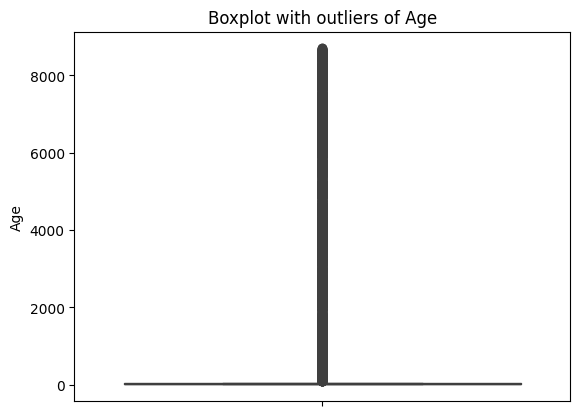

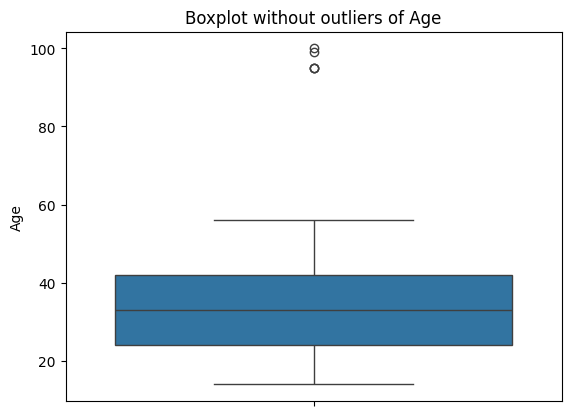

In [19]:


def remove_outliers(df, column, threshold, inplace=False):
    """A function to check and remove outliers"""
    
    # Visualizing a boxplot with outliers
    sns.boxplot(df[column])
    plt.title(f'Boxplot with outliers of {column}')
    plt.show()
    
    # Removing outliers
    if inplace:
        df.drop(df[df[column] > threshold].index, inplace=True)
        # Plotting the boxplot without outliers using the modified DataFrame
        sns.boxplot(df[column])
        plt.title(f'Boxplot without outliers of {column}')
        plt.show()
    else:
        removed_outliers = df[df[column] <= threshold]
        # Plotting the boxplot without outliers using the new DataFrame
        sns.boxplot(removed_outliers[column])
        plt.title(f'Boxplot without outliers of {column}')
        plt.show()
        return removed_outliers

# Example usage
# Assuming `df` is your DataFrame and you want to remove rows where 'Age' > 100
threshold = 100
remove_outliers(df, "Age", threshold, inplace=True)




In [20]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [21]:
df.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [22]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype("str")

### Data PreProcessing Numerical columns 

In [23]:
## Grouping the numerical columns 
numeric = df.select_dtypes(exclude="object").columns[1:]
numeric

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [24]:
# Fill NaN values in 'income' based on the same 'customer_id'
df[numeric] = df.groupby('Customer_ID')[numeric].transform(lambda x: x.fillna(x.mean()))

print("\nDataFrame after filling NaN values:")
df["Annual_Income"].isna().sum()


DataFrame after filling NaN values:


0

In [25]:
df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 97309 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             97309 non-null  float64
 1   Monthly_Inhand_Salary     97309 non-null  float64
 2   Num_Bank_Accounts         97309 non-null  int64  
 3   Num_Credit_Card           97309 non-null  int64  
 4   Interest_Rate             97309 non-null  int64  
 5   Num_of_Loan               97309 non-null  float64
 6   Delay_from_due_date       97309 non-null  int64  
 7   Num_of_Delayed_Payment    97309 non-null  float64
 8   Changed_Credit_Limit      97309 non-null  float64
 9   Num_Credit_Inquiries      97309 non-null  float64
 10  Outstanding_Debt          97309 non-null  float64
 11  Credit_Utilization_Ratio  97309 non-null  float64
 12  Total_EMI_per_month       97309 non-null  float64
 13  Amount_invested_monthly   97309 non-null  float64
 14  Monthly_Bal

In [26]:
def convert_to_years(age_str):
    """Convert age string into years as a float."""
    match = re.match(r'(\d+) Years and (\d+) Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + (months / 12)
    return None  # or raise an error if the format is incorrect

# Apply the conversion function to the 'Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)

In [27]:
# replace missing values of age and credit  history age 
(df.isna().sum()/len(df)) *100

Customer_ID                  0.000000
Month                        0.000000
Age                          5.075584
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary        0.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.392574
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       0.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         0.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.041301
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      0.000000
Payment_Behaviour            0.000000
Monthly_Balance              0.000000
Credit_Score                 0.000000
dtype: float64

In [28]:
# replace with  null values
imput=KNNImputer(n_neighbors= 2, weights="uniform")

# replacing the Age  null values using k nearest neighbours
df[["Age"]]=imput.fit_transform(df[["Age"]])


# replacing credit history  age using k nearest neighbours
df[["Credit_History_Age"]]=imput.fit_transform(df[["Credit_History_Age"]])

In [29]:
# checking if the  
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11086
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

### Data Preprocessing numerical columns

In [30]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.944960,18.436308,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [31]:
category = df.select_dtypes(exclude="float64").columns[1:]
category

Index(['Month', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [32]:
df[category].head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,_,No,High_spent_Small_value_payments,Good
1,February,Scientist,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,Good,No,Low_spent_Large_value_payments,Good
3,April,Scientist,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,Good,No,High_spent_Medium_value_payments,Good
5,June,Scientist,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,Good,No,!@9#%8,Good


In [33]:
df["Occupation"].value_counts()

Occupation
_______          6878
Lawyer           6395
Engineer         6181
Architect        6179
Scientist        6119
Accountant       6115
Mechanic         6104
Media_Manager    6074
Teacher          6052
Developer        6034
Entrepreneur     6020
Doctor           5926
Journalist       5911
Manager          5810
Musician         5763
Writer           5748
Name: count, dtype: int64

In [34]:
# Get unique occupations excluding the most frequent one
#Occupation = df["Occupation"].value_counts().index[1:] 

# initialize  an empty dataframe 
#df_emp = pd.DataFrame()

# for each occupation, create a  boolean  column 
#for i in Occupation :
    #df_emp[i] = df["Occupation"].str.contains(i)

# combine the helper dataframe with the  original one 
#df = pd.concat ([df,df_emp],axis = 1)

# delete the original occupational column 
#del df["Occupation"]


#df.dtypes



In [35]:
df.select_dtypes(include='bool')

""
0
1
3
4
5
...
99995
99996
99997
99998


In [36]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      24855
High_spent_Medium_value_payments    17060
Low_spent_Medium_value_payments     13484
High_spent_Large_value_payments     13350
High_spent_Small_value_payments     11042
Low_spent_Large_value_payments      10135
!@9#%8                               7383
Name: count, dtype: int64

In [37]:
# replacing unknown valuees with a nun column
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8",np.NaN)

df["Payment_Behaviour"].value_counts()


Payment_Behaviour
Low_spent_Small_value_payments      24855
High_spent_Medium_value_payments    17060
Low_spent_Medium_value_payments     13484
High_spent_Large_value_payments     13350
High_spent_Small_value_payments     11042
Low_spent_Large_value_payments      10135
Name: count, dtype: int64

In [38]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.944960,18.436308,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,NaN,340.479212,Good


In [39]:
df["Payment_Behaviour"].isna().sum()

7383

In [40]:
imputer=SimpleImputer(strategy="most_frequent")
df[["Payment_Behaviour"]]=imputer.fit_transform(df[["Payment_Behaviour"]])

In [41]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [42]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.944960,18.436308,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good


In [43]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [44]:
df.drop(columns=["Payment_of_Min_Amount", "Type_of_Loan"], inplace=True)


In [45]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,4.0,_,809.98,26.822620,22.083333,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,4.0,Good,809.98,31.944960,18.436308,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,4.0,Good,809.98,31.377862,22.333333,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,4.0,Good,809.98,24.797347,22.416667,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,4.0,Good,809.98,27.262259,22.500000,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good


In [46]:
# Assuming df is your DataFrame
df.drop(columns=["Customer_ID", "Month"], inplace=True)


## One hot encoding our variables

In [47]:
X = df.drop(columns="Credit_Score")
y=df["Credit_Score"]

In [48]:
y.value_counts()

Credit_Score
Standard    51765
Poor        28235
Good        17309
Name: count, dtype: int64

In [49]:
y= df["Credit_Score"].map({"Poor": 0, "Standard": 1, "Good": 2})



In [50]:
X = pd.get_dummies(X,drop_first=True,dtype='int')
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Occupation________,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.00,11.27,...,0,0,0,0,1,0,1,0,0,0
1,23.0,19114.12,1824.843333,3,4,3,4.0,-1,5.25,11.27,...,0,0,1,0,0,0,0,1,0,0
3,23.0,19114.12,1824.843333,3,4,3,4.0,5,4.00,6.27,...,0,0,1,0,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,5.25,11.27,...,0,0,1,0,0,1,0,0,0,0
5,23.0,19114.12,1824.843333,3,4,3,4.0,8,4.00,9.27,...,0,0,1,0,0,0,0,0,0,1


In [51]:
X = X.astype({col: 'float64' for col in X.select_dtypes('integer').columns})

# Check the data types after conversion
print(X.dtypes)

Age                                                   float64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                     float64
Num_Credit_Card                                       float64
Interest_Rate                                         float64
Num_of_Loan                                           float64
Delay_from_due_date                                   float64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_History_Age                                    float64
Total_EMI_per_month                                   float64
Amount_invested_monthly                               float64
Monthly_

In [52]:
y.head()

0    2
1    2
3    2
4    2
5    2
Name: Credit_Score, dtype: int64

### Building our machine learning model

In [53]:
from sklearn.preprocessing import RobustScaler

# Example: Using RobustScaler instead of StandardScaler
scaler = RobustScaler()
X= scaler.fit_transform(X)

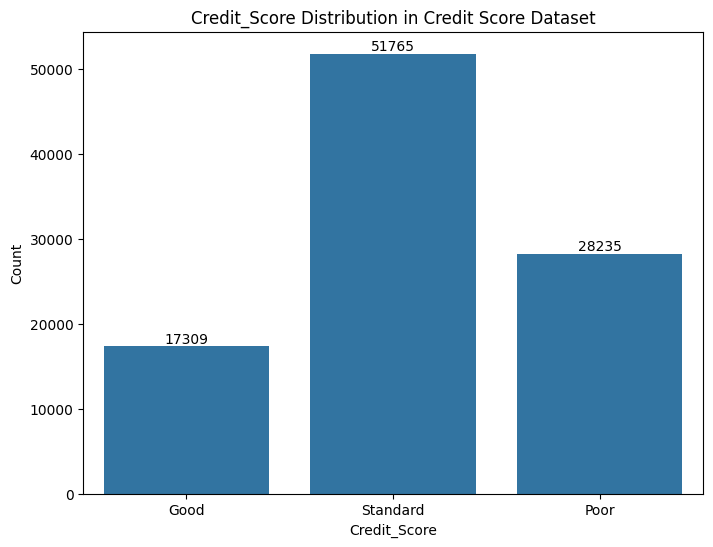

In [54]:
## checking for class imbalance

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

In [55]:
## using smote to correct the class imbalance
smote = SMOTE()

X,y = smote.fit_resample(X,y)

In [56]:
# split our data into train and test 
y.value_counts()

Credit_Score
2    51765
1    51765
0    51765
Name: count, dtype: int64

In [57]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

#### Logistic regression

In [58]:
# loading our regression model 
lr = LogisticRegression()
lr.fit(X_train,y_train)

# predicting our model 
y_pred = lr.predict(X_test)
 
# printing the classification report
report = classification_report(y_test,y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.72      0.64      0.68     15650
           1       0.60      0.56      0.58     15472
           2       0.68      0.82      0.74     15467

    accuracy                           0.67     46589
   macro avg       0.67      0.67      0.67     46589
weighted avg       0.67      0.67      0.67     46589



c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# check if the model is overfitting/underfitting

In [59]:
# Calculate training and test accuracy
# Predict on the training and test sets
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the classification report for test set
report = classification_report(y_test, test_predictions)
print(report)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Store accuracies for further analysis if needed
train_accuracies = [train_accuracy]
test_accuracies = [test_accuracy]

# Check for overfitting by comparing train and test accuracies
if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")
# Perform cross-validation
cross_val_accuracies = cross_val_score(lr, X_train, y_train, cv=5)

# Print the classification report for test set
report = classification_report(y_test, test_predictions)
print(report)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Cross-Validation Accuracies: {cross_val_accuracies}")
print(f"Mean Cross-Validation Accuracy: {cross_val_accuracies.mean()}")

# Store accuracies for further analysis if needed
train_accuracies = [train_accuracy]
test_accuracies = [test_accuracy]

# Check for overfitting or other issues
if train_accuracy == test_accuracy:
    print("The model is performing consistently on both training and test sets.")
elif train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model may be underfitting or there could be an issue with the data.")

# Additional checks using cross-validation
if abs(train_accuracy - cross_val_accuracies.mean()) < 0.01 and abs(test_accuracy - cross_val_accuracies.mean()) < 0.01:
    print("Cross-validation confirms consistent performance.")
else:
    print("There might be issues as cross-validation shows different results.")

              precision    recall  f1-score   support

           0       0.72      0.64      0.68     15650
           1       0.60      0.56      0.58     15472
           2       0.68      0.82      0.74     15467

    accuracy                           0.67     46589
   macro avg       0.67      0.67      0.67     46589
weighted avg       0.67      0.67      0.67     46589

Train Accuracy: 0.6715820653873751
Test Accuracy: 0.6706304063190882
The model may be overfitting.


c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

              precision    recall  f1-score   support

           0       0.72      0.64      0.68     15650
           1       0.60      0.56      0.58     15472
           2       0.68      0.82      0.74     15467

    accuracy                           0.67     46589
   macro avg       0.67      0.67      0.67     46589
weighted avg       0.67      0.67      0.67     46589

Train Accuracy: 0.6715820653873751
Test Accuracy: 0.6706304063190882
Cross-Validation Accuracies: [0.66631405 0.66123913 0.67462398 0.67522193 0.67402603]
Mean Cross-Validation Accuracy: 0.6702850253985876
The model may be overfitting.
Cross-validation confirms consistent performance.


c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Improving the  logistic regression model using random search cv

In [60]:
# creating distributions for hyperparameter tuning
distributions = {
    'C': uniform(0.1, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in the penalization
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

lr_r = RandomizedSearchCV(lr, random_state=0,param_distributions=distributions)
search = lr_r.fit(X_train,y_train)
search.best_params_

c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\dan\Lib\site-packages\sklearn\linear_mode

{'C': 4.336547993389047, 'penalty': 'l2', 'solver': 'liblinear'}

In [61]:
best_lr = search.best_estimator_

In [62]:

# Predict on the training set
train_predictions = best_lr.predict(X_train)

# Predict on the test set
test_predictions = best_lr.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the classification report for the test set
report = classification_report(y_test, test_predictions)
print(report)

# Print the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Store accuracies for further analysis if needed
train_accuracies = [train_accuracy]
test_accuracies = [test_accuracy]

# Check for overfitting or other issues
if train_accuracy == test_accuracy:
    print("The model is performing consistently on both training and test sets.")
elif train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model may be underfitting or there could be an issue with the data.")

              precision    recall  f1-score   support

           0       0.72      0.64      0.68     15650
           1       0.61      0.54      0.57     15472
           2       0.68      0.83      0.74     15467

    accuracy                           0.67     46589
   macro avg       0.67      0.67      0.66     46589
weighted avg       0.67      0.67      0.66     46589

Confusion Matrix:
 [[ 9998  3179  2473]
 [ 3424  8369  3679]
 [  438  2207 12822]]
Train Accuracy: 0.6718304417419462
Test Accuracy: 0.6694498701410204
The model may be overfitting.


#### Decision Tree model

In [63]:
# Initialize and train the DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini", random_state=42)
tree.fit(X, y)

# Predicting the labels for the test set
y_pred = tree.predict(X_test)

# Printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15650
           1       1.00      1.00      1.00     15472
           2       1.00      1.00      1.00     15467

    accuracy                           1.00     46589
   macro avg       1.00      1.00      1.00     46589
weighted avg       1.00      1.00      1.00     46589



In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(tree, X, y, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores and their average
print("Cross-validation F1 scores:", cv_scores)
print("Average F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.64121135 0.636742   0.69700478 0.74676876 0.75443139]
Average F1 score: 0.6952316596168397


Cross validation scores are better than the original scores so that means that the model is overfitting 


Decision Tree with CV

In [65]:
## using the grid search cv to correct the overfiitting 
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8]
}
# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV with 5-fold cross-validation
tree_cv = GridSearchCV(tree, param_grid=param_grid, cv=5) #scoring='f1_weighted')

# Fit the grid search to the training data
tree_cv.fit(X_train, y_train)

# Retrieve the best parameters found by GridSearchCV
best_params = tree_cv.best_params_

print("Best parameters found by GridSearchCV:", best_params)

Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
best_tree = tree_cv.best_estimator_

In [67]:

best_tree.fit(X, y)

# Predicting the labels for the test set
y_pred = best_tree.predict(X_test)

# Printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15650
           1       0.90      0.85      0.87     15472
           2       0.89      0.95      0.92     15467

    accuracy                           0.91     46589
   macro avg       0.91      0.91      0.90     46589
weighted avg       0.91      0.91      0.90     46589



### Random forest model 

In [68]:

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     15650
           1       0.84      0.76      0.80     15472
           2       0.86      0.92      0.89     15467

    accuracy                           0.85     46589
   macro avg       0.85      0.85      0.85     46589
weighted avg       0.85      0.85      0.85     46589



In [69]:
#### checking if our random forest moodel is 0verfitting 

# Predict on the training and test sets
train_pred = rf_classifier.predict(X_train)
test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print the classification report for test set
report = classification_report(y_test, test_pred)


In [70]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     15650
           1       0.84      0.76      0.80     15472
           2       0.86      0.92      0.89     15467

    accuracy                           0.85     46589
   macro avg       0.85      0.85      0.85     46589
weighted avg       0.85      0.85      0.85     46589



### Saving  the  decision forest model

In [71]:
import pickle
filename='decision_forest.sav'
pickle.dump(best_tree ,open(filename,'wb'))


In [72]:
loaded_model=pickle.load(open('decision_forest.sav','rb'))
loaded_model.score(X_test,y_test)

0.9051278198716435